In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pyaudio
import scipy
import scipy.signal
import time
%matplotlib notebook

In [3]:
fs = 44100

In [4]:
t = np.arange(int(fs*20e-3))/fs

In [5]:
chirp = scipy.signal.chirp(t, 1e3, 20e-3, 1e3)

<IPython.core.display.Javascript object>


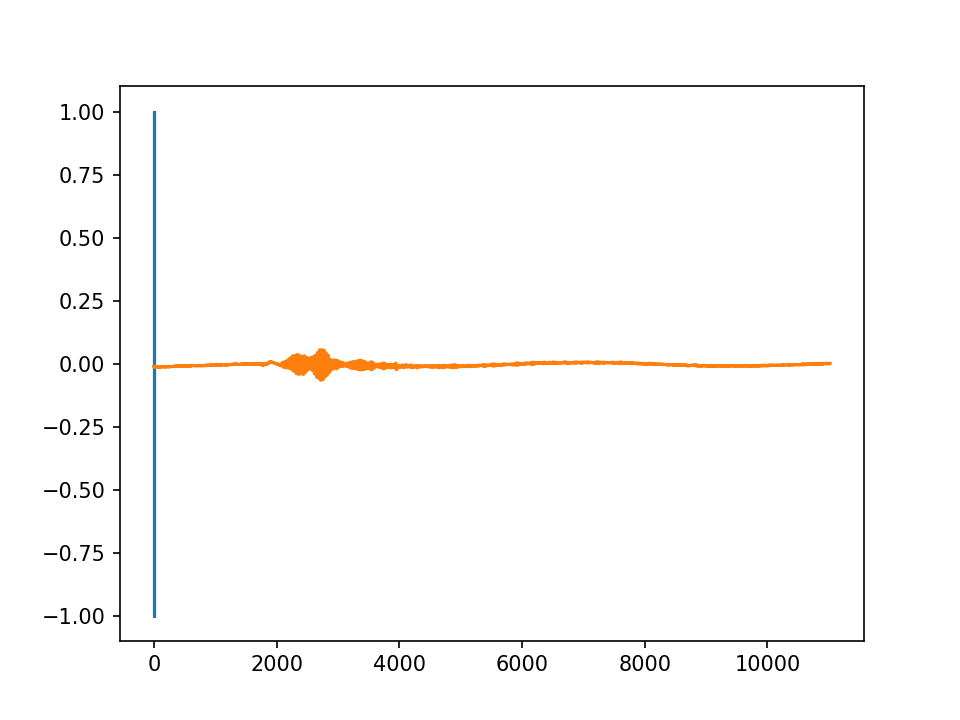

In [6]:
plt.plot(t, chirp)

In [ ]:
while True:
    play(chirp, 1)

In [7]:
import sonar
import queue
import math

In [8]:
def lcm(a, b):
    return abs(a*b) // math.gcd(a, b)

In [9]:
fs= 44100
f = 440;
duration = lcm(fs,f)
duration = 44100/50
t = np.arange(duration)/fs
data =0.5* np.sin(2*np.pi*f*t)
#data = np.bartlett(len(data))*data
print('duration: ', duration/fs)

duration:  0.02


In [10]:

p = pyaudio.PyAudio() #instantiate PyAudio


In [ ]:
def show_devices(audio):
    # audio = pyaudio.PyAudio()
    for i in range(audio.get_device_count()):
        print (i, audio.get_device_info_by_index(i))

In [ ]:
show_devices(p)

In [11]:
def play(out, data, reps=1):
    for i in range(reps):
        out.write( data.astype(np.float32).tobytes() )


In [112]:
fs= 44100
f = 4400;
duration = lcm(fs,f)
duration = 44100/20
t = np.arange(duration)/fs
chirp = 1 * scipy.signal.chirp(t, 17e3, 50e-3, 18e3)
# data =0.5* np.sin(2*np.pi*f*t)
#data = np.bartlett(len(data))*data
print('duration: ', duration/fs)
out = p.open(format=pyaudio.paFloat32, channels=1, rate=int(fs),output=True,output_device_index=2)
play(out, chirp)

duration:  0.05


In [27]:
while True:
    play(out, data)

KeyboardInterrupt: 

True
in_data 44100


<IPython.core.display.Javascript object>


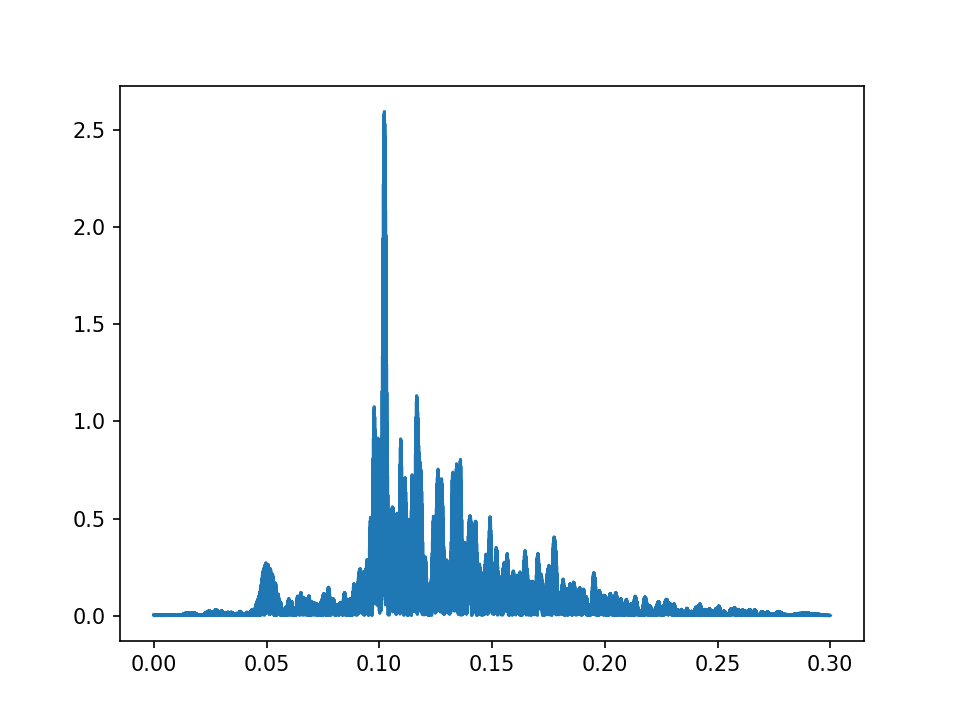

In [114]:
FORMAT=pyaudio.paFloat32
CHANNELS = 1
CHUNK=44100//4
RATE = 44100

def callback(in_data, frame_count, time_info, status):
    global data
    print('in_data', len(in_data))
    data = np.frombuffer(in_data, dtype=np.float32)
    return (None, pyaudio.paComplete)


stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                stream_callback=callback,
                frames_per_buffer=CHUNK)
print(stream.is_active())
# time.sleep(0.1)
play(out,chirp)
while stream.is_active():
   time.sleep(0.05)
stream.close()
xcorr = np.correlate(data, chirp, 'full')
plt.figure(2)
t = np.arange(len(xcorr))/fs
plt.plot(t, np.abs(xcorr))    